In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [25]:
model = keras.models.load_model('models/model1.h5')

In [4]:
background = None
accumulated_weight = 0.5
ROI_top = 100
ROI_bottom = 300
ROI_right = 100
ROI_left = 350

# img dimensions
SIZE = (28, 28)
CLASSES = dict(zip(range(0, 26), list(map(chr, range(97, 123))))) # labels from A to Z

In [5]:
def segment_hand(frame, threshold=25):
    global background
    diff = cv.absdiff(background.astype("uint8"), frame)
    
    _ , thresholded = cv.threshold(diff, threshold, 255, cv.THRESH_BINARY)
    
     # Fetching contours in the frame (These contours can be of hand or any other object in foreground) image, 
    contours, hierarchy = cv.findContours(thresholded.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    # If length of contours list = 0, means we didn't get any contours...
    if len(contours) == 0:
        return None
    else:
        # The largest external contour should be the hand 
        hand_segment_max_cont = max(contours, key=cv.contourArea)
        
        # Returning the hand segment(max contour) and the
        # thresholded image of hand...
        return (thresholded, hand_segment_max_cont)

def cal_accum_avg(frame, accumulated_weight):
    global background
    if background is None:
        background = frame.copy().astype("float")
        return None
    cv.accumulateWeighted(frame, background, accumulated_weight)

In [6]:
#https://data-flair.training/blogs/sign-language-recognition-python-ml-opencv/

cam = cv.VideoCapture(0)
num_frames =0
start = False
while True:
    ret, frame = cam.read()
    # flipping the frame to prevent inverted image of captured frame
    frame = cv.flip(frame, 1)
    frame_copy = frame.copy()

    # ROI from the frame
    roi = frame[ROI_top:ROI_bottom, ROI_right:ROI_left]
    gray_frame = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
    # gray_frame = cv.GaussianBlur(gray_frame, (9, 9), 0)

    if num_frames < 70:
        cal_accum_avg(gray_frame, accumulated_weight)
        cv.putText(frame_copy, "FETCHING BACKGROUND. PLEASE WAIT", (80, 400), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    else: 
        # segmenting the hand region
        hand = segment_hand(gray_frame)
        
        # Checking if we are able to detect the hand...
        if hand is not None:
            thresholded, hand_segment = hand
            # Drawing contours around hand segment
            cv.drawContours(frame_copy, [hand_segment + (ROI_right, ROI_top)], -1, (255, 0, 0),1)
            
            cv.imshow("Thesholded Hand Image", thresholded)
            # thresholded = np.array(thresholded)
            thresholded = cv.resize(thresholded, SIZE)
            # thresholded = np.reshape(thresholded, (1,thresholded.shape[0],thresholded.shape[1]))
            # thresholded = cv.cvtColor(thresholded, cv.COLOR_GRAY2RGB)
            # img = cv.cvtColor(thresholded, cv.COLOR_RGB2GRAY)
            
            if start:
                print(thresholded.shape)
                try:
                    pred = model.predict(thresholded)
                    print(CLASSES[np.argmax(pred)])
                except ValueError:
                    print("Error")
                    pass
            # cv.putText(frame_copy, CLASSES[np.argmax(pred)], (170, 45), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            
    # Draw ROI on frame_copy
    cv.rectangle(frame_copy, (ROI_left, ROI_top), (ROI_right, ROI_bottom), (255,128,0), 3)
    
    # incrementing the number of frames for tracking
    num_frames += 1

    # Display the frame with segmented hand
    k = cv.waitKey(1)
    if k == ord('a'):
        start = not start

    cv.putText(frame_copy, "Hand ROI",
    (10, 20), cv.FONT_ITALIC, 0.5, (51,255,51), 1)
    cv.imshow("Sign Detection", frame_copy)
    
    # Close windows with Esc
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

# Release the camera and destroy all the windows
cam.release()
cv.destroyAllWindows()

In [ ]:
cap = cv.VideoCapture(0)
start = False

try:
    while True:
        _, frame = cap.read()
        # reverse the frame because of the camera orientation
        frame = cv.flip(frame, 1)
        frame_copy = frame[100:400, 100:400]

        if start:
            region_of_interest = np.array(frame_copy)  # get the frame
            img = cv.cvtColor(region_of_interest, cv.COLOR_RGB2GRAY)

            # resize the image to 28x28
            img = cv.resize(img, SIZE)
            # prediction = get_predicted_class(model, img)
            
            # print(prediction)
            start = False

        cv.rectangle(frame_copy, (100,400), (100,400), (255,128,0), 3)
        cv.imshow("Collecting images", frame)

        k = cv.waitKey(10)
        if k == ord('a'):
            start = not start
        if k == ord('q'):
            break
except Exception as e:
    print(f"[ERR] {e}")
    pass

cap.release()
cv.destroyAllWindows()

In [44]:
# load image using opencv and make prediction
img = cv.imread('a.jpg')
# resize the image to 28x28
img = cv.resize(img, SIZE)
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img = np.array(img)
img = np.reshape(img, (28,28))
print(img.shape)

(28, 28)


In [45]:
img = img/255.0
img

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

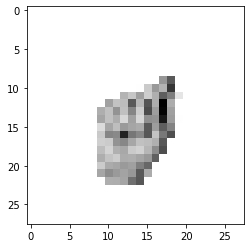

In [46]:
# show image
plt.imshow(img, cmap='gray')

In [47]:
prediction = model.predict(img)
print(CLASSES[np.argmax(prediction)])

ValueError: in user code:

    File "c:\Users\dell-2019\Anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\dell-2019\Anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\dell-2019\Anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\dell-2019\Anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "c:\Users\dell-2019\Anaconda3\envs\ML\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\dell-2019\Anaconda3\envs\ML\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 28), dtype=float32)
      • training=False
      • mask=None
